In [ ]:
# import seaborn as sns
# import pylab as py
# from scipy.stats import shapiro
# import numpy as np

In [35]:
%load_ext autoreload
%autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pingouin as pg
from scipy.stats import iqr
import statsmodels.api as sm

# Import from adjacent scripts.
import sys
import os
sys.path.append('..')
sys.path.append('../src')
sys.path.append('../audio')

import src.data_util as du
from src.defaults import DATA_PATH, MAX_INTEGER

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Perception of amplitude modulation-induced vibrato

Data analysis and exploration. Helper functions follow. Skip to next cell to see results.

### Study 1: Perceived fusion.

**Note**: 
Results are min-max normalized per subject.

condition
CONTROL        0.147191
BASIC          0.157215
PAM            0.157573
FROZEN         0.158757
SIMPLE         0.178666
SIMPLE_RAF     0.179621
FM_ONLY        0.192764
SHUFFLE_RAF    0.195152
SHUFFLE        0.197524
RAG            0.199279
RAG_RAF        0.215890
Name: response, dtype: float64

,mean,std
condition,,
BASIC,0.284222,0.229305
CONTROL,0.827195,0.209506
FM_ONLY,0.654227,0.301822
FROZEN,0.289416,0.212803
PAM,0.802485,0.226497
RAG,0.350900,0.232344
RAG_RAF,0.338635,0.239478
SHUFFLE,0.375910,0.236376
SHUFFLE_RAF,0.334792,0.242160


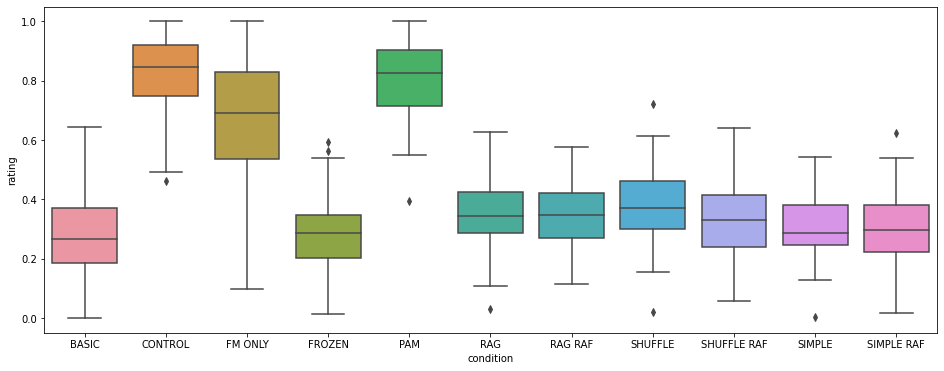

In [36]:
study_type = 0

df = du.load_and_clean_data()
df = du.min_max_norm(df)
df = du.isolate_study(df, study_type)
df = df.reset_index(drop=True)

# The average variation of ratings, within subject, per stimulus condition.
display(du.average_std_of_ratings(df).sort_values())

display(du.get_summary(df))
du.box_plot(df, study_type, savefig=True)
# du.response_histograms(df, 10)

# The average minimum response per stim condition, per subject.
# df.groupby(['subjectNo','condition'])['response'].min().groupby('condition').mean()

In [3]:
df['subjectNo'].nunique()

50

### Study 2: Perceived realism

Perceived realism.

**Note**:
Ratings are min-max normalized per subject.

condition
BASIC          0.203836
CONTROL        0.185349
FM_ONLY        0.208319
FROZEN         0.192242
PAM            0.202311
RAG            0.211911
RAG_RAF        0.226326
SHUFFLE        0.220420
SHUFFLE_RAF    0.224484
SIMPLE         0.211067
SIMPLE_RAF     0.207559
Name: response, dtype: float64

,mean,std
condition,,
BASIC,0.635573,0.280864
CONTROL,0.383148,0.319881
FM_ONLY,0.495426,0.313030
FROZEN,0.594353,0.265677
PAM,0.380236,0.313012
RAG,0.571733,0.258197
RAG_RAF,0.513825,0.273695
SHUFFLE,0.554518,0.264120
SHUFFLE_RAF,0.461906,0.281960


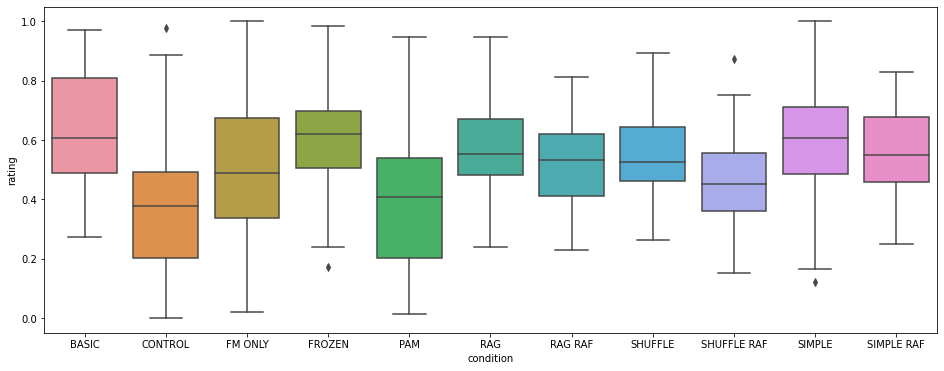

In [37]:
study_type = 1

df = du.load_and_clean_data()
df = du.isolate_study(df, study_type)
df = du.min_max_norm(df)
df = df.reset_index(drop=True)

display(du.average_std_of_ratings(df))

display(du.get_summary(df))
du.box_plot(df, study_type, savefig=True)
# du.response_histograms(df, 10)

In [5]:
df['subjectNo'].nunique()

46

# Main statistical analysis

### Anova, T-test and check for normal distribution

In [56]:
# Indicate study type here (0 -> fusion, 1 -> realism)
study_type = 1

df = du.load_and_clean_data()

df = du.isolate_study(df, study_type)
df = du.min_max_norm(df)
df = du.anova_prep(df)
df = df.reset_index(drop=True)

# ANOVA with repeated measures notes.

# for condition in df['condition'].unique():
#     print(f"Condition: {condition}")
#     display(pg.normality(df[df['condition']==condition]['rating']))
#     sm.qqplot(df[df['condition']==condition]['rating'], fit=True, line="45")
#     plt.savefig(f"./figs/qq_studytype_{study_type}_{condition}.png", dpi=300)

# display(df.rm_anova(dv='rating', within='condition', subject='subjectNo', correction=True))
# # display(pg.friedman(data=df, dv='rating', within='condition', subject='subjectNo', method='f'))

tmp = df.pairwise_ttests(
    dv='rating', 
    within='condition',
    subject='subjectNo', 
    padjust='holm',
    parametric=True  # False -> Use Wilcoxon
)

# for i in range(4):
#     display(tmp.loc[i*10:i*10 + 9])
    
display(tmp)

,Contrast,A,B,Paired,Parametric,T,dof,Tail,p-unc,p-corr,p-adjust,BF10,hedges
0,condition,BASIC,CONTROL,True,True,4.702836,45.0,two-sided,0.000025,0.001253,holm,850.493,1.130040
1,condition,BASIC,FM_ONLY,True,True,3.118800,45.0,two-sided,0.003164,0.094915,holm,10.534,0.657640
2,condition,BASIC,FROZEN,True,True,2.196621,45.0,two-sided,0.033240,0.713901,holm,1.41,0.221292
3,condition,BASIC,PAM,True,True,4.728441,45.0,two-sided,0.000023,0.001175,holm,919.003,1.189960
4,condition,BASIC,RAG,True,True,2.920625,45.0,two-sided,0.005443,0.157843,holm,6.555,0.373892
5,condition,BASIC,RAG_RAF,True,True,4.388283,45.0,two-sided,0.000068,0.003277,holm,332.647,0.699784
6,condition,BASIC,SHUFFLE,True,True,3.604177,45.0,two-sided,0.000780,0.029627,holm,36.545,0.475276
7,condition,BASIC,SHUFFLE_RAF,True,True,5.365670,45.0,two-sided,0.000003,0.000148,holm,6586.03,0.955670
8,condition,BASIC,SIMPLE,True,True,1.801644,45.0,two-sided,0.078303,1.000000,holm,0.708,0.223386
9,condition,BASIC,SIMPLE_RAF,True,True,3.261813,45.0,two-sided,0.002115,0.067690,holm,15.023,0.433110


## Inference

The plan:

- Multiple linear regresion, from timbre toolbox ratings to realness, fusion.
- Descriptor commonalities among stimulus conditions?
- Perhaps, perhaps, train three quantile linear classifiers, 25%, 50%, 75%.

### Post hoc

Tables that quantify the variability in the randomized stimulus conditions.

In [39]:
import seaborn as sns
import numpy as np

MEAN


,HARMONIC__SpectralFlatnessMed,HARMONIC__HarmonicEnergyMed
condition,,
BASIC,0.022108,0.053695
FROZEN,0.050567,0.054469
SHUFFLE_RAF,0.107734,0.050392
FM_ONLY,0.135728,0.065172
SIMPLE,0.145187,0.054381
SHUFFLE,0.157036,0.053736
SIMPLE_RAF,0.179144,0.048754
RAG,0.204452,0.050211
RAG_RAF,0.222249,0.044283


STD


,HARMONIC__SpectralFlatnessMed,HARMONIC__HarmonicEnergyMed
condition,,
BASIC,0.013514,0.011716
CONTROL,0.015548,0.015165
FM_ONLY,0.066602,0.016293
FROZEN,0.029989,0.011906
PAM,0.037341,0.014939
RAG,0.104338,0.012426
RAG_RAF,0.117039,0.010486
SHUFFLE,0.080529,0.012463
SHUFFLE_RAF,0.080594,0.010604


Coefficient of Variability


,HARMONIC__SpectralFlatnessMed,HARMONIC__HarmonicEnergyMed
condition,,
BASIC,0.611250,0.218197
CONTROL,0.038336,0.229495
FM_ONLY,0.490706,0.250000
FROZEN,0.593055,0.218578
PAM,0.093781,0.247174
RAG,0.510330,0.247474
RAG_RAF,0.526611,0.236782
SHUFFLE,0.512806,0.231920
SHUFFLE_RAF,0.748082,0.210430


,mean,std,coefficient_of_variation
HARMONIC__SpectralFlatnessMed,0.184358,0.138511,0.751316
HARMONIC__HarmonicEnergyMed,0.054692,0.014302,0.261503


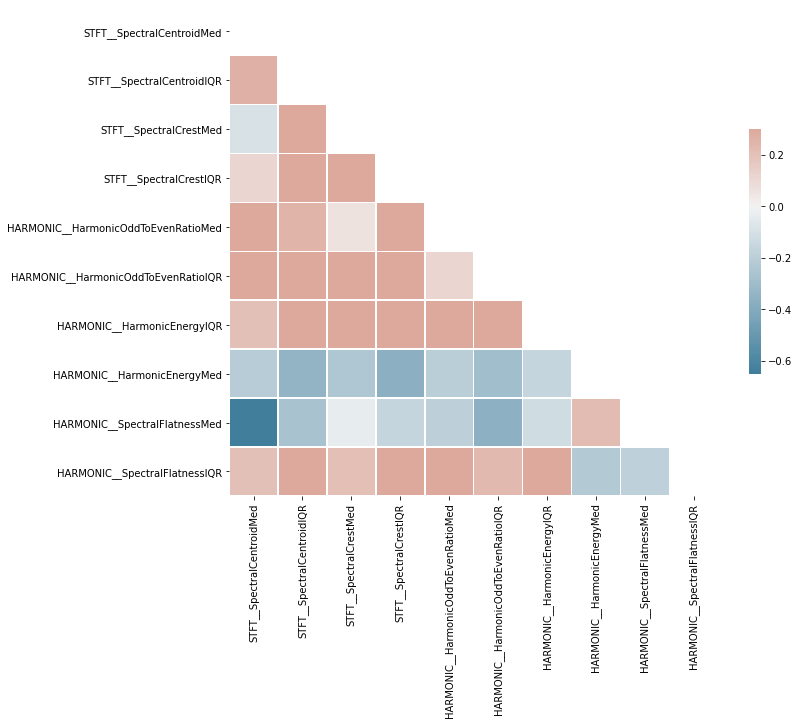

In [50]:
df = du.load_and_clean_data()
tmp = du.load_tt_descriptors()

df = pd.merge(tmp, df, on='stimulus')

pd.set_option('display.max_columns', None)
features = [
    'STFT__SpectralCentroidMed',
    'STFT__SpectralCentroidIQR',
    
    'STFT__SpectralCrestMed',
    'STFT__SpectralCrestIQR',
    
    'HARMONIC__HarmonicOddToEvenRatioMed',
    'HARMONIC__HarmonicOddToEvenRatioIQR',
    
    'HARMONIC__HarmonicEnergyIQR',
    'HARMONIC__HarmonicEnergyMed',
    
    'HARMONIC__SpectralFlatnessMed',
    'HARMONIC__SpectralFlatnessIQR',
    
    
#     'STFT__SpectralSpreadMed',
#     'STFT__SpectralSkewnessMed',
#     'STFT__SpectralKurtosisMed',
#     'STFT__SpectralFlatnessMed',
#     'STFT__SpectralSlopeMed',
#     'STFT__SpectralDecreaseMed',
#     'STFT__SpectralRollOffMed', 
#     'STFT__SpectralFluxMed', 
#     'HARMONIC__PitchIQR',
#     'HARMONIC__SpectralCentroidIQR',
#     'HARMONIC__SpectralSpreadIQR',
#     'HARMONIC__SpectralSkewnessIQR',
#     'HARMONIC__SpectralKurtosisIQR', 
#     'HARMONIC__SpectralCrestIQR',
#     'HARMONIC__SpectralSlopeIQR',
#     'HARMONIC__SpectralDecreaseIQR',
#     'HARMONIC__SpectralRollOffIQR',
#     'HARMONIC__SpectralVariationIQR',
#     'HARMONIC__SpectralFluxIQR', 
#     'HARMONIC__HarmonicSpectralDeviationIQR',
#     'HARMONIC__Tristimulus_1IQR',
#     'HARMONIC__Tristimulus_2IQR',
#     'HARMONIC__Tristimulus_3IQR',
#     'HARMONIC__InharmonicityIQR',
#     'HARMONIC__NoiseEnergyIQR',
#     'HARMONIC__NoisinessIQR',
#     'STFT__SpectralSpreadIQR',
#     'STFT__SpectralSkewnessIQR',
#     'STFT__SpectralKurtosisIQR',
#     'STFT__SpectralFlatnessIQR',
#     'STFT__SpectralSlopeIQR',
#     'STFT__SpectralDecreaseIQR',
#     'STFT__SpectralRollOffIQR',
#     'STFT__SpectralVariationIQR',
#     'STFT__SpectralFluxIQR',
#     'HARMONIC__PitchMed',
#     'HARMONIC__SpectralCentroidMed',
#     'HARMONIC__SpectralSpreadMed',
#     'HARMONIC__SpectralSkewnessMed',
#     'HARMONIC__SpectralKurtosisMed',
#     'HARMONIC__SpectralFlatnessMed',
#     'HARMONIC__SpectralCrestMed',
#     'HARMONIC__SpectralSlopeMed',
#     'HARMONIC__SpectralDecreaseMed',
#     'HARMONIC__SpectralRollOffMed',
#     'HARMONIC__SpectralVariationMed',
#     'HARMONIC__SpectralFluxMed',
#     'HARMONIC__HarmonicSpectralDeviationMed',
#     'HARMONIC__Tristimulus_1Med',
#     'HARMONIC__Tristimulus_2Med',
#     'HARMONIC__Tristimulus_3Med',
#     'HARMONIC__InharmonicityMed',
#     'HARMONIC__NoiseEnergyMed',
#     'HARMONIC__NoisinessMed'
]

corr = tmp[features].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# these_feats = [    
#     'HARMONIC__SpectralFlatnessMed',
# #     'HARMONIC__SpectralFlatnessIQR',
# #     'HARMONIC__HarmonicEnergyIQR',
#     'HARMONIC__HarmonicEnergyMed',
# ]

import copy
this_feats = copy.copy(features)

print('='*50 + '\nMEAN\n' + '='*50)
display(df.groupby('condition')[these_feats].mean().sort_values(by='HARMONIC__SpectralFlatnessMed'))

print('='*50 + '\nSTD\n' + '='*50)
display(df.groupby('condition')[these_feats].std())

print('='*50 + '\nCoefficient of Variability\n' + '='*50)
display(df.groupby('condition')[these_feats].std()/df.groupby('condition')[these_feats].mean())

tmp = pd.DataFrame()
tmp['mean'] = df[these_feats].mean()
tmp['std'] = df[these_feats].std()
tmp['coefficient_of_variation'] = tmp['std']/tmp['mean']
display(tmp)

## Relationship between descriptors and ratings

In [41]:
# Inspecting relationship between TT descriptors and ratings.

study_type = 1

tmp_index = features + ['stimulus']

df = du.load_and_clean_data()
df = du.min_max_norm(df)

tt = du.load_tt_descriptors()
df = pd.merge(tt[tmp_index], df, on='stimulus')
df = du.isolate_study(df, study_type=study_type)

print('='*20+'Correlations within subject within condition.'+'='*20)

correlations = pd.DataFrame()

for subject in df['subjectNo'].unique():
    # Calculate within subject correlations to descriptors.
    tmp = df[df['subjectNo'] == subject]
    tmp = tmp.groupby('condition')[features].corrwith(tmp['response'], method='spearman')
    tmp['subjectNo'] = subject
    correlations = correlations.append(tmp)
    
tmp = correlations.groupby('condition')[features].mean()
display(tmp)

print('='*20+'Correlations within subject.'+'='*20)
for feature in features:    
    pearson = du.within_subject_correlation(df, feature, 'pearson')
    spearman = du.within_subject_correlation(df, feature, 'spearman')
    
    spiel = f"{feature}, pearson = {pearson}, spearman = {spearman}"
    print(spiel)

====================Correlations within subject within condition.====================


,STFT__SpectralCentroidMed,STFT__SpectralCentroidIQR,STFT__SpectralCrestMed,STFT__SpectralCrestIQR,HARMONIC__HarmonicOddToEvenRatioMed,HARMONIC__HarmonicOddToEvenRatioIQR,HARMONIC__HarmonicEnergyIQR,HARMONIC__HarmonicEnergyMed,HARMONIC__SpectralFlatnessMed,HARMONIC__SpectralFlatnessIQR
condition,,,,,,,,,,
BASIC,-0.016203,-0.051275,0.115992,0.046061,-0.045740,-0.061753,-0.001625,0.004306,0.057218,0.003937
CONTROL,-0.021720,-0.048195,0.043276,-0.085649,-0.069227,0.010980,-0.061942,-0.010442,0.029122,-0.022928
FM_ONLY,0.023348,-0.052232,-0.087150,0.037709,-0.038738,0.023283,-0.022290,-0.021232,0.063161,-0.042637
FROZEN,0.051096,0.117823,0.046585,-0.154013,-0.013051,-0.072635,-0.037413,-0.043955,-0.009076,-0.018267
PAM,-0.000418,-0.003569,-0.084278,-0.031807,-0.057058,-0.015077,-0.064840,-0.072614,0.037791,0.007505
RAG,-0.064084,0.062661,0.102151,0.049929,0.063468,0.084643,-0.124954,-0.131356,-0.046067,-0.007858
RAG_RAF,-0.086520,-0.016242,-0.005172,0.010176,-0.040369,0.044012,0.130968,0.083732,0.143070,-0.071737
SHUFFLE,0.036022,-0.000294,0.004060,0.001607,0.053064,0.048480,0.010225,-0.050395,-0.027477,0.072342
SHUFFLE_RAF,0.114428,0.040477,0.108583,-0.008638,-0.032257,0.083333,-0.009207,-0.053082,-0.010419,0.030856


====================Correlations within subject.====================
STFT__SpectralCentroidMed, pearson = 0.20255973268627847, spearman = 0.20280350686296228
STFT__SpectralCentroidIQR, pearson = 0.14455539563284378, spearman = 0.16947406737642237
STFT__SpectralCrestMed, pearson = 0.07822259255160184, spearman = 0.13335585811769454
STFT__SpectralCrestIQR, pearson = 0.10746576547148919, spearman = 0.13117747687255032
HARMONIC__HarmonicOddToEvenRatioMed, pearson = 0.05160313689464156, spearman = -0.02396660161269468
HARMONIC__HarmonicOddToEvenRatioIQR, pearson = 0.169818105494133, spearman = 0.1998872411459657
HARMONIC__HarmonicEnergyIQR, pearson = 0.11218546268310922, spearman = 0.12626733221955977
HARMONIC__HarmonicEnergyMed, pearson = -0.07760558446690155, spearman = -0.055475058744374264
HARMONIC__SpectralFlatnessMed, pearson = -0.18835795576973294, spearman = -0.1719820125676359
HARMONIC__SpectralFlatnessIQR, pearson = 0.09993110373559579, spearman = 0.11656882412646821


In [13]:
# Linear regression.

study_type = 1
tmp_index = features + ['stimulus']

df = du.load_and_clean_data()
df = du.min_max_norm(df)
tt = du.load_tt_descriptors()
df = pd.merge(tt[tmp_index], df, on='stimulus')

df_ = du.isolate_study(df, study_type=study_type)

new = df_.groupby('condition')[features + ['response']].mean()
new.to_csv(f"rates_tt_study_{study_type}.csv")

lm = pg.linear_regression(df_[features], df_['response'])
display(lm.round(4))

sse = np.sum(lm.residuals_**2)
n = 4400
k = 10

def AIC(_n, _k, _sse):
    return _n * np.log(_sse/_n) + 2*_k

print(f"Simple multiple regression AIC:\t {AIC(n, lm.df_model_, sse)}")

# formula = 'response ~ ' + ' + '.join([f + '|groups' for f in features])
model = sm.MixedLM(df_['response'],df_[features], groups=df_["subjectNo"])
result = model.fit(reml=False)
print(result.summary())
print(f"AIC:\t{result.aic}")
print(f"BIC:\t{result.bic}")

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-2.0194,0.6203,-3.2555,0.0011,0.0588,0.0565,-3.2356,-0.8033
1,STFT__SpectralCentroidMed,0.0056,0.0011,4.9785,0.0000,0.0588,0.0565,0.0034,0.0078
2,STFT__SpectralCentroidIQR,0.0005,0.0003,1.5390,0.1239,0.0588,0.0565,-0.0001,0.0012
3,STFT__SpectralCrestMed,0.6340,0.8736,0.7257,0.4681,0.0588,0.0565,-1.0788,2.3468
4,STFT__SpectralCrestIQR,-0.3295,0.8214,-0.4011,0.6884,0.0588,0.0565,-1.9398,1.2809
5,HARMONIC__HarmonicOddToEvenRatioMed,-0.2294,0.1198,-1.9144,0.0556,0.0588,0.0565,-0.4642,0.0055
6,HARMONIC__HarmonicOddToEvenRatioIQR,0.0648,0.0641,1.0121,0.3116,0.0588,0.0565,-0.0608,0.1905
7,HARMONIC__HarmonicEnergyIQR,-0.6698,1.4593,-0.4590,0.6463,0.0588,0.0565,-3.5309,2.1913
8,HARMONIC__HarmonicEnergyMed,0.2461,0.3603,0.6831,0.4946,0.0588,0.0565,-0.4603,0.9526
9,HARMONIC__SpectralFlatnessMed,-0.1285,0.0459,-2.7983,0.0052,0.0588,0.0565,-0.2186,-0.0385


Simple multiple regression AIC:	 -11377.837862984925
                    Mixed Linear Model Regression Results
Model:                     MixedLM        Dependent Variable:        response 
No. Observations:          4048           Method:                    ML       
No. Groups:                46             Scale:                     0.0753   
Min. group size:           88             Log-Likelihood:            -557.5985
Max. group size:           88             Converged:                 Yes      
Mean group size:           88.0                                               
------------------------------------------------------------------------------
                                    Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------------
STFT__SpectralCentroidMed            0.002    0.000  5.590 0.000  0.001  0.003
STFT__SpectralCentroidIQR            0.000    0.000  1.346 0.178 -0.000  0.001
STFT__SpectralCrestM

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [7]:
study_type = 0

tmp_index = features + ['stimulus']

df = du.load_and_clean_data()
df = du.min_max_norm(df)

tt = du.load_tt_descriptors()
df = pd.merge(tt[tmp_index], df, on='stimulus')

tt_means = df[features].mean()

In [23]:
# Logistic regression on quantiles.

study_type = 0

tmp_index = features + ['stimulus']

df = du.load_and_clean_data()
df = du.min_max_norm(df)

tt = du.load_tt_descriptors()
df = pd.merge(tt[tmp_index], df, on='stimulus')
df = du.isolate_study(df, study_type=study_type)

# Standardize.
df[features] = (df[features] - df[features].mean())/df[features].std()

# Range normalize.
# df[features] = (df[features] - df[features].min())/(df[features].max() - df[features].min()) 

# Convert each subjects' ratings into 1/0 above below median.
quantile = .50
df['response'] = df.groupby('subjectNo')['response'].transform(
    lambda x: (x < np.quantile(x, q=quantile)).astype(int)
)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

X = df[features]
y = df['response']
clf = LogisticRegression(max_iter=200)
scores = cross_validate(clf, X, y, return_estimator=True, scoring=['roc_auc'])

In [27]:
scores['estimator'][0].intercept_

array([-0.07622949])

In [24]:
# print(scores.keys())
print(f"ROC AUC:\t{scores['test_roc_auc'].mean()}")

tmp = []
for est in scores['estimator']:
    tmp.append(est.coef_)
    
ans = dict(zip(features, np.array(tmp).squeeze().mean(axis=0)))

for key, val in ans.items():
    print(f"{key}:\t{val}")

ROC AUC:	0.7398858521592123
STFT__SpectralCentroidMed:	0.7128298331690445
STFT__SpectralCentroidIQR:	0.1723944030189358
STFT__SpectralCrestMed:	0.29239722320127626
STFT__SpectralCrestIQR:	0.040004440772270146
HARMONIC__HarmonicOddToEvenRatioMed:	-0.04237170811944522
HARMONIC__HarmonicOddToEvenRatioIQR:	-0.09168302582832635
HARMONIC__HarmonicEnergyIQR:	0.18561126441818815
HARMONIC__HarmonicEnergyMed:	0.006021138622016707
HARMONIC__SpectralFlatnessMed:	-0.3148393770928664
HARMONIC__SpectralFlatnessIQR:	0.0931881909178502


# Explorations

In [142]:
np.mean(lm.residuals_**2)

0.06149825289965787

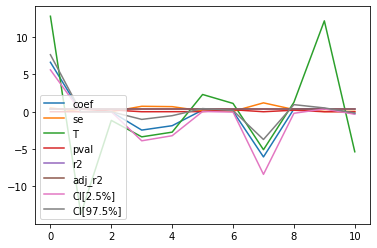